USD to Birr Exchange Rate Forecaster 
== 

Required Data 

Exchange Rate and Dates history

Main influncial datas for foreign currency exchange 

- Inflation Rates 
- Interest Rate 
- Terms of Trade || Ethiopian and United States of America   

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler

In [3]:
#Helper functions 

def normalize_Date_col(dates):
    
    new_dates = dates
    for i in range(dates.shape[0]):
        date = dates[i]
        month_to_changed = date[:3]
        day = date[4:6] 
        year = date[8:12]
        month = ""
        #print(month_to_changed)
        if month_to_changed == "Jan":
            month = "01"
        elif month_to_changed == "Feb":
            month = "02"
        elif month_to_changed == "Mar":
            month = "03"
        elif month_to_changed == "Apr":
            month = "04"
        elif month_to_changed == "May":
            month = "05"
        elif month_to_changed == "Jun":
            month = "06"
        elif month_to_changed == "Jul":
            month = "07"
        elif month_to_changed == "Aug":
            month = "08"
        elif month_to_changed == "Sep":
            month = "09"
        elif month_to_changed == "Oct":
            month = "10"
        elif month_to_changed == "Nov":
            month = "11"
        elif month_to_changed == "Dec":
            month = "12"
        else: 
            month = "error"
            
        new_date = date[8:12] + "-" +  month + "-" + date[4:6]
       
        new_dates[i] = new_date
    return new_dates
            

In [4]:
Data = pd.read_csv("../Documents/MSC/AI ITSC/ML/Project/Training_Data_Engineered/EBirr_TO_USD_Forcaseter_Traininng_Data.csv")

In [5]:
Data

,Date,Price,Open,High,Low,Change %,et_Import,et_Export,Eth_Imp_Exp_Blnc,GDB,Debt,PST
0,"Apr 15, 2021",41.6969,41.6838,41.6969,41.3550,0.20%,39.0,32.0,-7.0,92.00,58.70,1.33
1,"Apr 14, 2021",41.6150,41.6676,41.6838,41.3500,0.08%,39.0,32.0,-7.0,92.00,58.70,1.33
2,"Apr 13, 2021",41.5825,41.6541,41.6905,41.3500,0.06%,39.0,32.0,-7.0,92.00,58.70,1.33
3,"Apr 12, 2021",41.5555,41.6377,41.6888,41.3250,0.08%,39.0,32.0,-7.0,92.00,58.70,1.33
4,"Apr 09, 2021",41.5227,41.6245,41.6674,41.5962,0.68%,39.0,32.0,-7.0,92.00,58.70,1.33
...,...,...,...,...,...,...,...,...,...,...,...,...
2679,"Jan 07, 2011",16.6415,16.5590,16.6415,16.5590,0.00%,137.5,7.6,-129.9,31.95,2.56,1.51
2680,"Jan 06, 2011",16.6420,16.5560,16.6990,16.5560,0.02%,137.5,7.6,-129.9,31.95,2.56,1.51
2681,"Jan 05, 2011",16.6390,16.5530,16.6960,16.5530,0.02%,137.5,7.6,-129.9,31.95,2.56,1.51
2682,"Jan 04, 2011",16.6360,16.5510,16.6360,16.5510,0.02%,137.5,7.6,-129.9,31.95,2.56,1.51


In [6]:
req_Data = Data[['Date' , 'Price' , 'Eth_Imp_Exp_Blnc' , "GDB" , 'Debt' , 'PST']]

In [7]:
req_Data

,Date,Price,Eth_Imp_Exp_Blnc,GDB,Debt,PST
0,"Apr 15, 2021",41.6969,-7.0,92.00,58.70,1.33
1,"Apr 14, 2021",41.6150,-7.0,92.00,58.70,1.33
2,"Apr 13, 2021",41.5825,-7.0,92.00,58.70,1.33
3,"Apr 12, 2021",41.5555,-7.0,92.00,58.70,1.33
4,"Apr 09, 2021",41.5227,-7.0,92.00,58.70,1.33
...,...,...,...,...,...,...
2679,"Jan 07, 2011",16.6415,-129.9,31.95,2.56,1.51
2680,"Jan 06, 2011",16.6420,-129.9,31.95,2.56,1.51
2681,"Jan 05, 2011",16.6390,-129.9,31.95,2.56,1.51
2682,"Jan 04, 2011",16.6360,-129.9,31.95,2.56,1.51


In [8]:
USD = np.ones(req_Data['Date'].shape)

In [9]:
req_Data["USD"] = USD

<ipython-input-9-19db13b99c2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_Data["USD"] = USD


In [10]:
req_Data['Date'][0] = "Apr 15, 2021"

<ipython-input-10-a0989de8d394>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_Data['Date'][0] = "Apr 15, 2021"
/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
req_Data

,Date,Price,Eth_Imp_Exp_Blnc,GDB,Debt,PST,USD
0,"Apr 15, 2021",41.6969,-7.0,92.00,58.70,1.33,1.0
1,"Apr 14, 2021",41.6150,-7.0,92.00,58.70,1.33,1.0
2,"Apr 13, 2021",41.5825,-7.0,92.00,58.70,1.33,1.0
3,"Apr 12, 2021",41.5555,-7.0,92.00,58.70,1.33,1.0
4,"Apr 09, 2021",41.5227,-7.0,92.00,58.70,1.33,1.0
...,...,...,...,...,...,...,...
2679,"Jan 07, 2011",16.6415,-129.9,31.95,2.56,1.51,1.0
2680,"Jan 06, 2011",16.6420,-129.9,31.95,2.56,1.51,1.0
2681,"Jan 05, 2011",16.6390,-129.9,31.95,2.56,1.51,1.0
2682,"Jan 04, 2011",16.6360,-129.9,31.95,2.56,1.51,1.0


In [12]:
#re_arrange Data 

req_Data = req_Data[['Date' , "Price"  , "Eth_Imp_Exp_Blnc" , "GDB" , "Debt" , "PST"]]

In [13]:

req_Data["Date"] = Data["Date"]
new_Dates = normalize_Date_col(req_Data["Date"])

<ipython-input-13-f746e52afecc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_Data["Date"] = Data["Date"]
<ipython-input-3-4fde800398f3>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dates[i] = new_date
<ipython-input-13-f746e52afecc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_Dates = normalize_Date_col(req_Data["Date"])


In [14]:
req_Data

,Date,Price,Eth_Imp_Exp_Blnc,GDB,Debt,PST
0,2021-04-15,41.6969,-7.0,92.00,58.70,1.33
1,2021-04-14,41.6150,-7.0,92.00,58.70,1.33
2,2021-04-13,41.5825,-7.0,92.00,58.70,1.33
3,2021-04-12,41.5555,-7.0,92.00,58.70,1.33
4,2021-04-09,41.5227,-7.0,92.00,58.70,1.33
...,...,...,...,...,...,...
2679,2011-01-07,16.6415,-129.9,31.95,2.56,1.51
2680,2011-01-06,16.6420,-129.9,31.95,2.56,1.51
2681,2011-01-05,16.6390,-129.9,31.95,2.56,1.51
2682,2011-01-04,16.6360,-129.9,31.95,2.56,1.51


In [15]:
req_Data["Date"] = pd.to_datetime(req_Data["Date"])

<ipython-input-15-1a5228b60450>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_Data["Date"] = pd.to_datetime(req_Data["Date"])


In [16]:
req_Data

,Date,Price,Eth_Imp_Exp_Blnc,GDB,Debt,PST
0,2021-04-15,41.6969,-7.0,92.00,58.70,1.33
1,2021-04-14,41.6150,-7.0,92.00,58.70,1.33
2,2021-04-13,41.5825,-7.0,92.00,58.70,1.33
3,2021-04-12,41.5555,-7.0,92.00,58.70,1.33
4,2021-04-09,41.5227,-7.0,92.00,58.70,1.33
...,...,...,...,...,...,...
2679,2011-01-07,16.6415,-129.9,31.95,2.56,1.51
2680,2011-01-06,16.6420,-129.9,31.95,2.56,1.51
2681,2011-01-05,16.6390,-129.9,31.95,2.56,1.51
2682,2011-01-04,16.6360,-129.9,31.95,2.56,1.51


In [212]:
#lets visualize some data 

#import mathplot

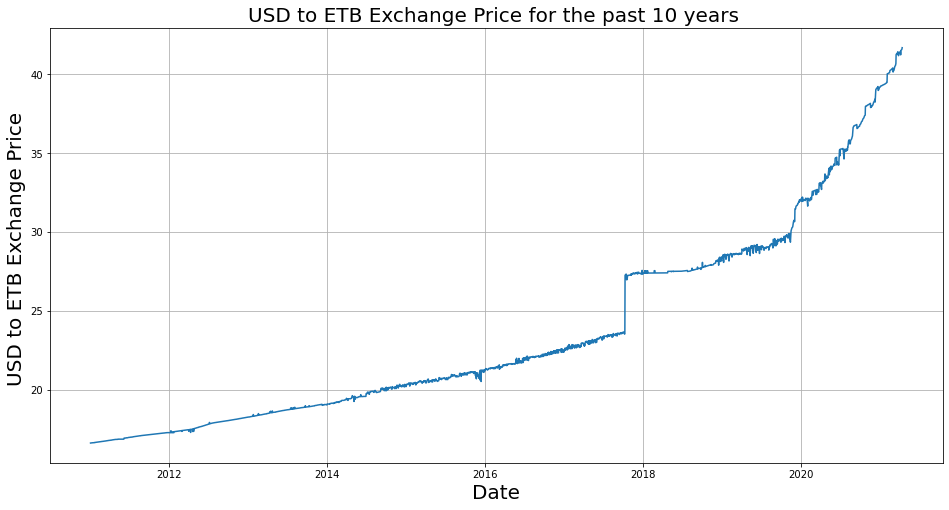

In [17]:

plt.figure(figsize = (16,8))
plt.plot( req_Data["Date"] , req_Data['Price'])

plt.xlabel('Date' , fontsize="20")
plt.ylabel('USD to ETB Exchange Price ' , fontsize = "20" )
plt.title('USD to ETB Exchange Price for the past 10 years ' , fontsize = "20")
plt.grid()

plt.show()

# Exchange Rate and other factors through time 

fig, ax = plt.subplots()

ax.plot( req_Data["Date"] , req_Data['Price'] , label='Exchange Rate')

ax.plot( req_Data["Date"] , req_Data['GDB'] , label = "GDB")
ax.plot( req_Data["Date"] , req_Data['Debt'] , label = "Dept")
ax.plot( req_Data["Date"] , req_Data['PST'] , label = "PST ")
ax.plot( req_Data["Date"] , req_Data['Eth_Imp_Exp_Blnc'] , label = "Eth_Imp_Exp_Blnc ")

ax.set(xlabel='Date', ylabel='Histories',
       title='USD to ETB Exchange Price for the past 10 years ')
ax.grid()
ax.legend()
plt.show()



In [18]:
#explain the data 
req_Data.describe()

,Price,Eth_Imp_Exp_Blnc,GDB,Debt,PST
count,2684.000000,2684.000000,2684.000000,2684.000000,2684.00000
mean,23.671885,-61.451602,68.197949,37.526788,-0.78598
std,6.214876,91.861573,21.348068,16.937466,1.23324
min,16.633500,-426.300000,31.950000,2.560000,-1.68000
25%,18.805250,-119.000000,47.650000,28.600000,-1.50000
50%,21.413000,-25.700000,74.300000,34.900000,-1.34000
75%,27.716525,-0.200000,84.270000,57.000000,-1.27000
max,41.696900,37.500000,95.910000,60.000000,1.56000


In [214]:
#Get the Price Column 



In [19]:
price_Data = req_Data.filter(['Price'])
price_Data

,Price
0,41.6969
1,41.6150
2,41.5825
3,41.5555
4,41.5227
...,...
2679,16.6415
2680,16.6420
2681,16.6390
2682,16.6360


In [20]:
#change to numpy array
price_Data = price_Data.values
price_Data

array([[41.6969],
       [41.615 ],
       [41.5825],
       ...,
       [16.639 ],
       [16.636 ],
       [16.6335]])

In [21]:
req_Data

,Date,Price,Eth_Imp_Exp_Blnc,GDB,Debt,PST
0,2021-04-15,41.6969,-7.0,92.00,58.70,1.33
1,2021-04-14,41.6150,-7.0,92.00,58.70,1.33
2,2021-04-13,41.5825,-7.0,92.00,58.70,1.33
3,2021-04-12,41.5555,-7.0,92.00,58.70,1.33
4,2021-04-09,41.5227,-7.0,92.00,58.70,1.33
...,...,...,...,...,...,...
2679,2011-01-07,16.6415,-129.9,31.95,2.56,1.51
2680,2011-01-06,16.6420,-129.9,31.95,2.56,1.51
2681,2011-01-05,16.6390,-129.9,31.95,2.56,1.51
2682,2011-01-04,16.6360,-129.9,31.95,2.56,1.51


In [218]:
#prepare the data in X (independant variable ) and Y (dependannt variable)

In [22]:
x = req_Data[['Date','Eth_Imp_Exp_Blnc' , 'GDB' , 'Debt' , 'PST']]

In [23]:
x['Date'] = x['Date'].map(datetime.toordinal)

<ipython-input-23-fcd9041cbd55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Date'] = x['Date'].map(datetime.toordinal)


In [25]:
x.describe()

,Date,Eth_Imp_Exp_Blnc,GDB,Debt,PST
count,2684.000000,2684.000000,2684.000000,2684.000000,2684.00000
mean,736017.300298,-61.451602,68.197949,37.526788,-0.78598
std,1084.927370,91.861573,21.348068,16.937466,1.23324
min,734140.000000,-426.300000,31.950000,2.560000,-1.68000
25%,735078.750000,-119.000000,47.650000,28.600000,-1.50000
50%,736017.500000,-25.700000,74.300000,34.900000,-1.34000
75%,736956.250000,-0.200000,84.270000,57.000000,-1.27000
max,737895.000000,37.500000,95.910000,60.000000,1.56000


In [26]:
y = req_Data['Price']

In [294]:
#lets split the data into train and test data 80/20
# we use the sklearn library 

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [44]:
#lets train 4 years of data to our model and predict one month(after the 4 years) 

x_train1 , y_train1 , x_test1 , y_test1 = x.iloc[1641:,] , y.iloc[1641:,] , x.iloc[1619:1642,] , y.iloc[1619:1642,]


(23, 5)

In [45]:
x_train1.shape , x.shape , x_test1.shape

((1043, 5), (2684, 5), (23, 5))

In [47]:
#Next step is to train the model 

#we used Multiple Linear Regressionn 

regressor = LinearRegression()


In [48]:
regressor.fit(x_train1 , y_train1)

LinearRegression()

In [298]:
regressor

LinearRegression()

In [49]:
regressor.coef_

array([ 2.64165261e-03, -8.94470617e-05,  7.18815952e-03, -9.97368338e-03,
        1.50200662e-02])

In [52]:
y_pred1 = regressor.predict(x_test1)

In [53]:
pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1 , "Difference" : y_test1 - y_pred1})

,Actual,Predicted,Difference
1619,20.4050,20.338602,0.066398
1620,20.4050,20.335960,0.069040
1621,20.4300,20.333318,0.096682
1622,20.4000,20.330677,0.069323
1623,20.4100,20.328035,0.081965
1624,20.3900,20.320110,0.069890
1625,20.4000,20.317469,0.082531
1626,20.4500,20.314827,0.135173
1627,20.4050,20.312185,0.092815
1628,20.2425,20.309544,-0.067044


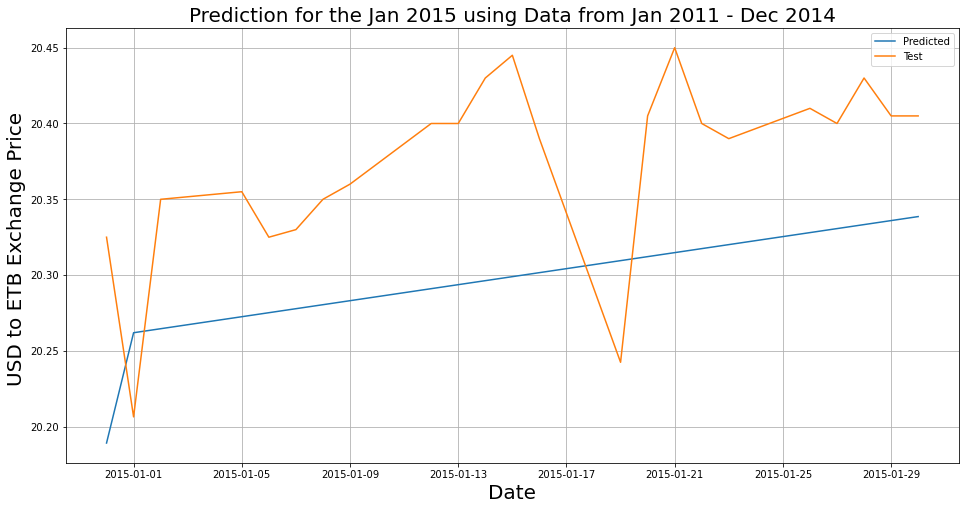

In [127]:
plt.figure(figsize = (16,8))
plt.plot(req_Data["Date"][1619:1642] , y_pred1 , label = "Predicted")
plt.plot(req_Data["Date"][1619:1642] , y_test1 , label = "Test")
plt.xlabel('Date' , fontsize="20")
plt.ylabel('USD to ETB Exchange Price ' , fontsize = "20" )
plt.title('Prediction for the Jan 2015 using Data from Jan 2011 - Dec 2014' , fontsize = "20")
plt.grid()
plt.legend()
plt.show()

In [59]:
Max_Error = max(y_test1 - y_pred1)
Min_Error = min(y_test1 - y_pred1)
Max_Error , Min_Error

(0.14602301513998128, -0.06704359530164794)

In [60]:
#Final Step Examine the prediction 

#we use ssklearnn meterics to check

In [61]:
MAE = metrics.mean_absolute_error(y_test1, y_pred1)
MSE = metrics.mean_squared_error(y_test1, y_pred1)
RMSE = np.sqrt(MSE)

In [62]:
MAE , MSE , RMSE

(0.08789489724099066, 0.0084708701749681, 0.09203733033377326)

In [63]:
RMSE / (max_Price - min_Price) * 100

0.3672180563442042

In [65]:
#second Iteration 

#train model with 8 years of data and predict the next 2 years 

x_train2 , y_train2 , x_test2 , y_test2 = x.iloc[598:,] , y.iloc[598:,] , x.iloc[575:598,] , y.iloc[575:598,]



In [67]:
x_train2.shape , x.shape , x_test2.shape

((2086, 5), (2684, 5), (23, 5))

In [68]:
regressor2 = LinearRegression()

In [70]:
regressor2.fit(x_train2 , y_train2)

LinearRegression()

In [90]:
regressor2.coef_

array([ 0.00678532,  0.00132757, -0.13250217,  0.03644217,  0.65329306])

In [72]:
y_pred2 = regressor2.predict(x_test2)

In [73]:
pd.DataFrame({'Actual': y_test2, 'Predicted': y_pred2 , "Difference" : y_test2 - y_pred2})

,Actual,Predicted,Difference
575,28.5676,27.024660,1.542940
576,28.5739,27.017875,1.556025
577,28.6120,27.011090,1.600910
578,28.5373,27.004304,1.532996
579,28.5442,26.983948,1.560252
580,28.5674,26.977163,1.590237
581,28.5528,26.970378,1.582422
582,28.5647,26.963592,1.601108
583,28.2828,26.956807,1.325993
584,28.4700,26.936451,1.533549


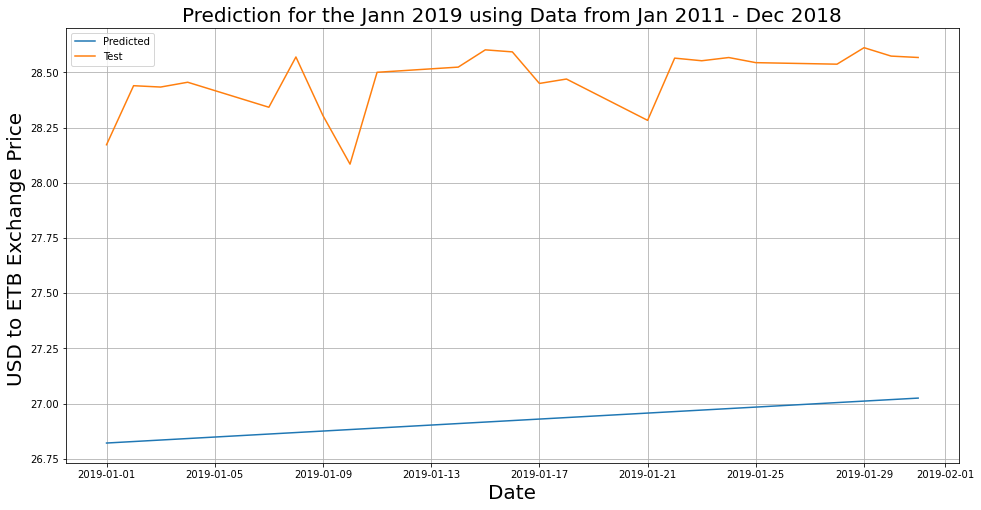

In [126]:
plt.figure(figsize = (16,8))
plt.plot(req_Data["Date"][575:598] , y_pred2 , label = "Predicted")
plt.plot(req_Data["Date"][575:598] , y_test2 , label = "Test")
plt.xlabel('Date' , fontsize="20")
plt.ylabel('USD to ETB Exchange Price ' , fontsize = "20" )
plt.title('Prediction for the Jann 2019 using Data from Jan 2011 - Dec 2018' , fontsize = "20")
plt.grid()
plt.legend()
plt.show()

In [75]:
Max_Error = max(y_test2 - y_pred2)

Min_Error = min(y_test2 - y_pred2)

Max_Error , Min_Error

(1.7013020741301652, 1.2023314278922683)

In [82]:
MAE2 = metrics.mean_absolute_error(y_test2, y_pred2)
MSE2 = metrics.mean_squared_error(y_test2, y_pred2)
RMSE2 = np.sqrt(MSE2)

In [83]:
MAE2 , MSE2 , RMSE2

(1.5442803587459775, 2.3984084064646924, 1.5486795686857537)

In [84]:
RMSE2 / (max_Price - min_Price) * 100

6.179048208486295

In [85]:
#Final Training : Fit the more than 99 percent of the data  until the end of March 2021


0.6286672254819782

In [98]:
#second Iteration 

#train model with 8 years of data and predict the next 2 years 

x_train3 , y_train3 , x_test3 , y_test3 = x.iloc[11:,] , y.iloc[11:,] , x.iloc[:11,] , y.iloc[:11,]



In [99]:
x_train3.shape , x.shape , x_test3.shape

((2673, 5), (2684, 5), (11, 5))

In [100]:
regressor3 = LinearRegression()

In [101]:
regressor3.fit(x_train3 , y_train3)

LinearRegression()

In [102]:
regressor3.coef_

array([ 0.01146833,  0.00275925, -0.30118011,  0.0215594 ,  1.02398016])

In [103]:
y_pred3 = regressor3.predict(x_test3)



In [104]:
y_test3.size

11

In [105]:
pd.DataFrame({'Actual': y_test3, 'Predicted': y_pred3 , "Difference" : y_test3 - y_pred3})

,Actual,Predicted,Difference
0,41.6969,40.807666,0.889234
1,41.6150,40.796198,0.818802
2,41.5825,40.784729,0.797771
3,41.5555,40.773261,0.782239
4,41.5227,40.738856,0.783844
5,41.2409,40.727388,0.513512
6,41.4626,40.715919,0.746681
7,41.4365,40.704451,0.732049
8,41.4029,40.692983,0.709917
9,41.3765,40.658578,0.717922


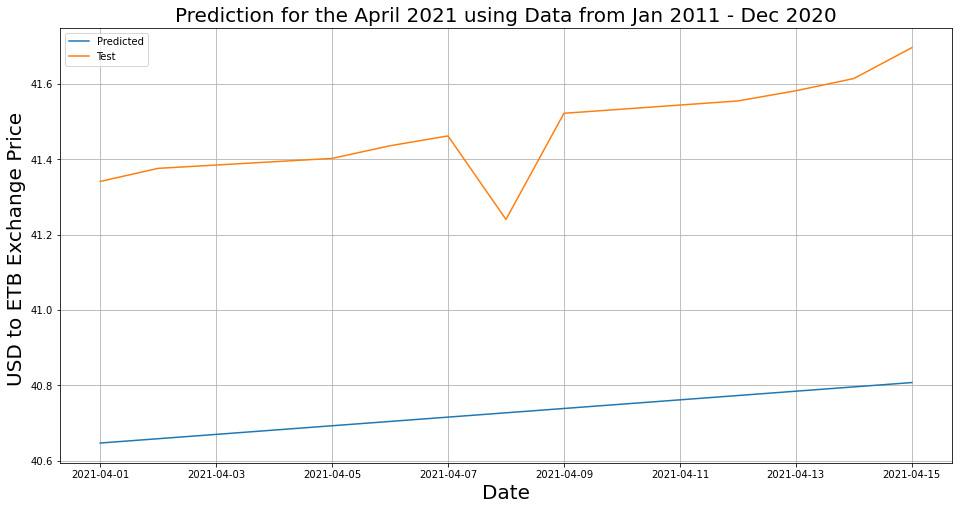

In [125]:
plt.figure(figsize = (16,8))
plt.plot(req_Data["Date"][:11,] , y_pred3 , label = "Predicted")
plt.plot(req_Data["Date"][:11,] , y_test3 , label = "Test")
plt.xlabel('Date' , fontsize="20")
plt.ylabel('USD to ETB Exchange Price ' , fontsize = "20" )
plt.title('Prediction for the April 2021 using Data from Jan 2011 - Dec 2020' , fontsize = "20")
plt.grid()
plt.legend()
plt.show()

In [108]:
Max_Error3 = max(y_test3 - y_pred3)

Min_Error3 = min(y_test3 - y_pred3)

Max_Error3 , Min_Error3

(0.8892341311012331, 0.5135124648597795)

In [109]:
MAE3 = metrics.mean_absolute_error(y_test3, y_pred3)
MSE3 = metrics.mean_squared_error(y_test3, y_pred3)
RMSE3 = np.sqrt(MSE3)

In [110]:
MAE3 , MSE3 , RMSE3

(0.7442330708987913, 0.5620816173327756, 0.7497210263376476)

In [115]:
RMSE3 / (np.max(y_train3) - np.min(y_train3)) * 100

3.022520213419531

In [116]:
np.max(y_train3) - np.min(y_train3)

24.8045